# Test Throughput class

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : Augurst 5th 2023
- last update : Augurst 18th 2023

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
from matplotlib.patches import Rectangle

%matplotlib inline
import pickle
import h5py
import seaborn as sns
import copy
from collections import OrderedDict

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [3]:
sys.path.append('./lib')
from libThroughputFit import *

libThroughputFit.py :: Use atmosphtransmemullsst.__path__[0],'../data/simplegrid as the path to data
libThroughputFit.py :: data_path = /Volumes/Backup2020/MacOSX/GitHub/LSST/atmosphtransmemullsst/atmosphtransmemullsst/../data/simplegrid
SimpleAtmEmulator:path=/Volumes/Backup2020/MacOSX/GitHub/LSST/atmosphtransmemullsst/atmosphtransmemullsst/../data/simplegrid


In [4]:
#path = "../../BouguerLines/202307/dataout/MLfitsmoothGPsmoothGP-absbadremoved-2023-January-17-18-mucol.csv"
path = "dataout/throughput-2023-01-18-empty~holo4_003-psf2dffm-multifitatmparams-polar.csv"

# Class Throughput

In [5]:
th = Throughput(path)

In [6]:
th.printinfo()

Throughputinfo : Throughput
Total number of points 670
	 wl  =  [355. 356. 357. 358. 359.]
	 th  =  [0.00917598 0.00920563 0.00930466 0.00947106 0.00970285]
	 eth =  [0.00042481 0.00043311 0.00044499 0.00045928 0.00047523]


In [7]:
wl = np.arange(350.,1100.)

In [8]:
wl.shape

(750,)

In [9]:
y_th,ey_th = th.fitthrouputwithgp(wl)

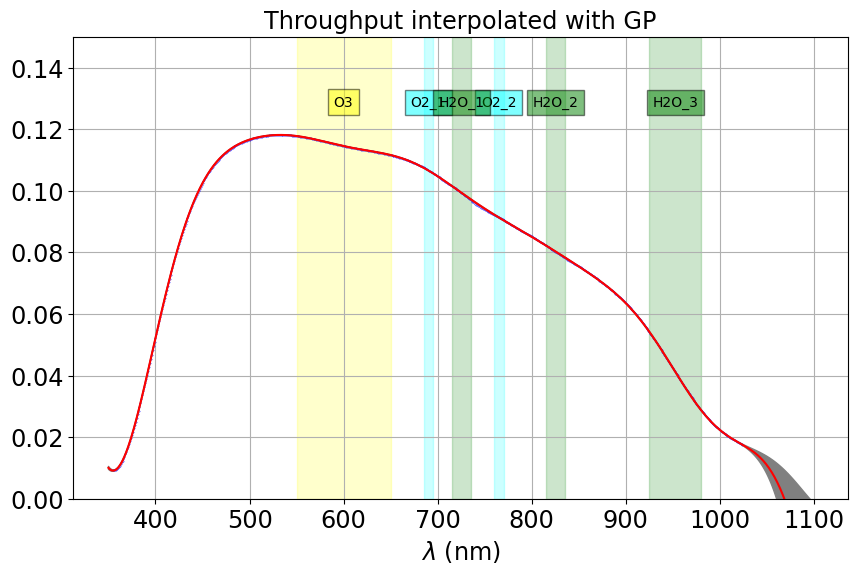

In [10]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

ax.plot(th.wl,th.th,'.',color="b", markersize=0.5)
ax.plot(wl,y_th,'-',color="r", markersize=0.5)
ax.fill_between(wl, y_th-ey_th, y_th+ey_th,color="grey")

the_ymin = 0
the_ymax = .15
the_yscale = the_ymax  - the_ymin 


for item in Dict_Absbands.items():
    key = item[0]
    val = item[1]
    idx_abscolor = val[2] 
    the_x = (val[0]+val[1])/2.
    the_y = the_ymax - 0.15* the_yscale
    rect = Rectangle((val[0],the_ymin),val[1]-val[0],the_ymax,linewidth=1,edgecolor=Absbands_Colors[idx_abscolor],facecolor=Absbands_Colors[idx_abscolor],alpha=0.2)
    ax.add_patch(rect)
    ax.text(the_x, the_y, key, horizontalalignment='center',bbox=dict(facecolor=Absbands_Colors[idx_abscolor], alpha=0.5))
    
ax.set_ylim(the_ymin,the_ymax)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("Throughput interpolated with GP")
ax.grid()

# ThroughputCut class

In [11]:
th = ThrouputCut(path,absband_list = ["O3","O2_2","H2O_2","H2O_3"])

In [12]:
th.printinfo()

Throughputinfo : ThrouputCut
Throughputinfo : ThrouputCut
Total number of points 670
	 wl  =  [355. 356. 357. 358. 359.]
	 th  =  [0.00917598 0.00920563 0.00930466 0.00947106 0.00970285]
	 eth =  [0.00042481 0.00043311 0.00044499 0.00045928 0.00047523]


In [13]:
th.removedbands['O3']['wl'][-1]

650.0

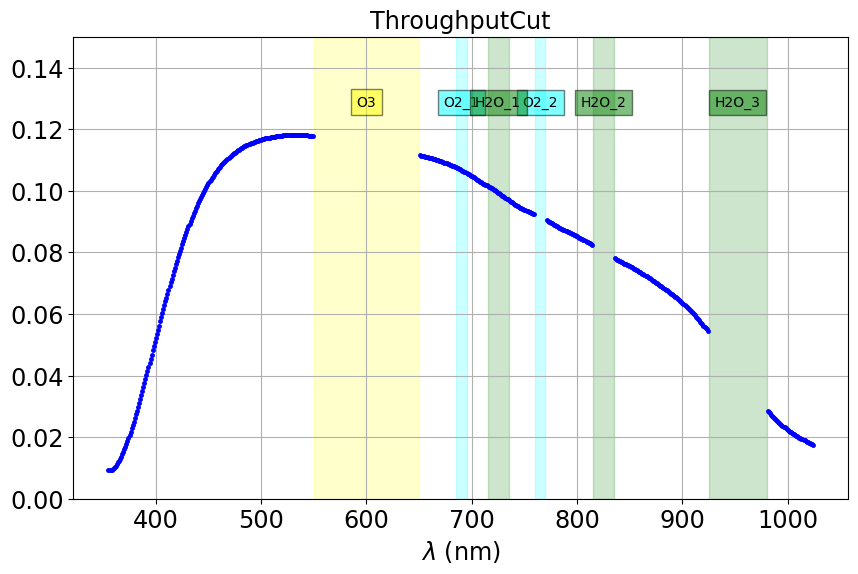

In [14]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

ax.plot(th.wl,th.th,'.',color="b", markersize=5)

the_ymin = 0
the_ymax = .15
the_yscale = the_ymax  - the_ymin 


for item in Dict_Absbands.items():
    key = item[0]
    val = item[1]
    idx_abscolor = val[2] 
    the_x = (val[0]+val[1])/2.
    the_y = the_ymax - 0.15* the_yscale
    rect = Rectangle((val[0],the_ymin),val[1]-val[0],the_ymax,linewidth=1,edgecolor=Absbands_Colors[idx_abscolor],facecolor=Absbands_Colors[idx_abscolor],alpha=0.2)
    ax.add_patch(rect)
    ax.text(the_x, the_y, key, horizontalalignment='center',bbox=dict(facecolor=Absbands_Colors[idx_abscolor], alpha=0.5))
    
ax.set_ylim(the_ymin,the_ymax)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("ThroughputCut")
ax.grid()

In [15]:
y_th,ey_th = th.fitthrouputwithgp(wl)

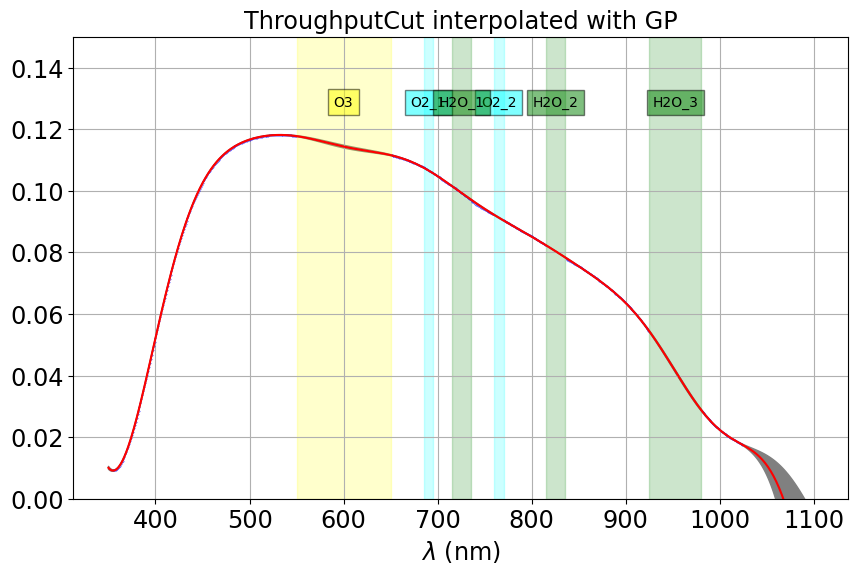

In [16]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

ax.plot(th.wl,th.th,'.',color="b", markersize=0.5)
ax.plot(wl,y_th,'-',color="r", markersize=0.5)
ax.fill_between(wl, y_th-ey_th, y_th+ey_th,color="grey")

the_ymin = 0
the_ymax = .15
the_yscale = the_ymax  - the_ymin 


for item in Dict_Absbands.items():
    key = item[0]
    val = item[1]
    idx_abscolor = val[2] 
    the_x = (val[0]+val[1])/2.
    the_y = the_ymax - 0.15* the_yscale
    rect = Rectangle((val[0],the_ymin),val[1]-val[0],the_ymax,linewidth=1,edgecolor=Absbands_Colors[idx_abscolor],facecolor=Absbands_Colors[idx_abscolor],alpha=0.2)
    ax.add_patch(rect)
    ax.text(the_x, the_y, key, horizontalalignment='center',bbox=dict(facecolor=Absbands_Colors[idx_abscolor], alpha=0.5))
    
ax.set_ylim(the_ymin,the_ymax)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("ThroughputCut interpolated with GP")
ax.grid()

## ThroughputAddPointsReso

In [17]:
th = ThrouputAddPointsReso(path,absband_list = ["O3","O2_2","H2O_2","H2O_3"],reso=20)

In [18]:
th.printinfo()

Throughputinfo : ThrouputAddPointsReso
Throughputinfo : ThrouputAddPointsReso
Total number of points 670
	 wl  =  [355. 356. 357. 358. 359.]
	 th  =  [0.00917598 0.00920563 0.00930466 0.00947106 0.00970285]
	 eth =  [0.00042481 0.00043311 0.00044499 0.00045928 0.00047523]
Throughputinfo : ThrouputAddPointsReso
	 number of points in bands = 8
	 O3 , npts = 4
	 O2_2 , npts = 1
	 H2O_2 , npts = 1
	 H2O_3 , npts = 2


In [19]:
th

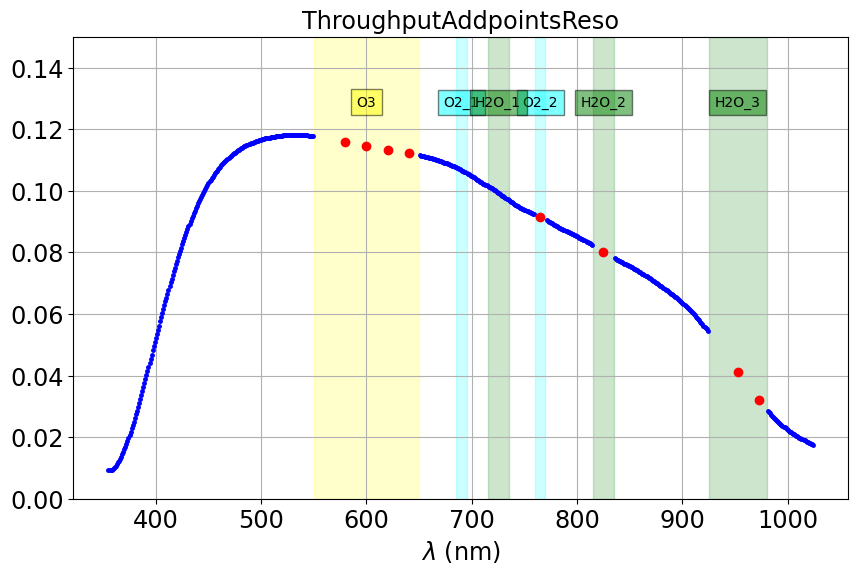

In [20]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

ax.plot(th.wl,th.th,'.',color="b", markersize=5)
for item in th.pointsinbands.items():
    key = item[0]
    val = item[1]
    ax.plot(val["wl"],val["th"],'or')

the_ymin = 0
the_ymax = .15
the_yscale = the_ymax  - the_ymin 


for item in Dict_Absbands.items():
    key = item[0]
    val = item[1]
    idx_abscolor = val[2] 
    the_x = (val[0]+val[1])/2.
    the_y = the_ymax - 0.15* the_yscale
    rect = Rectangle((val[0],the_ymin),val[1]-val[0],the_ymax,linewidth=1,edgecolor=Absbands_Colors[idx_abscolor],facecolor=Absbands_Colors[idx_abscolor],alpha=0.2)
    ax.add_patch(rect)
    ax.text(the_x, the_y, key, horizontalalignment='center',bbox=dict(facecolor=Absbands_Colors[idx_abscolor], alpha=0.5))
    
ax.set_ylim(the_ymin,the_ymax)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("ThroughputAddpointsReso")
ax.grid()

## Classd ThrouputAddPointsN

In [21]:
#th = ThrouputAddPointsN(path,absband_list = ["O3","O2_2","H2O_2","H2O_3"],npoints_list=[3,1,1,4])
th = ThrouputAddPointsN(path,absband_list = ["O3","O2_2","H2O_2","H2O_3"],npoints_list=[1,1,1,4])

In [22]:
th.printinfo()

Throughputinfo : ThrouputAddPointsN
Throughputinfo : ThrouputAddPointsN
Total number of points 670
	 wl  =  [355. 356. 357. 358. 359.]
	 th  =  [0.00917598 0.00920563 0.00930466 0.00947106 0.00970285]
	 eth =  [0.00042481 0.00043311 0.00044499 0.00045928 0.00047523]
Throughputinfo : ThrouputAddPointsN
	 number of points in bands = 7
	 O3 , npts = 1
	 O2_2 , npts = 1
	 H2O_2 , npts = 1
	 H2O_3 , npts = 4


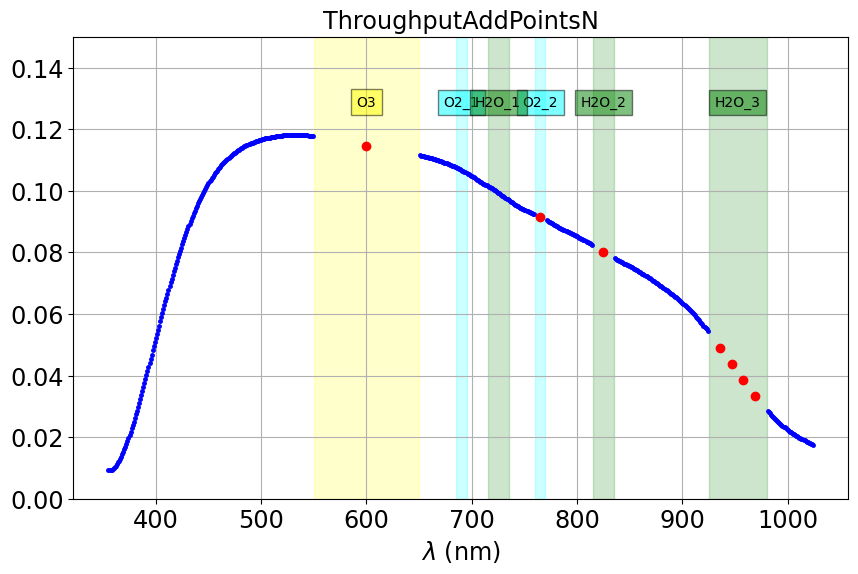

In [23]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

ax.plot(th.wl,th.th,'.',color="b", markersize=5)
for item in th.pointsinbands.items():
    key = item[0]
    val = item[1]
    ax.plot(val["wl"],val["th"],'or')

the_ymin = 0
the_ymax = .15
the_yscale = the_ymax  - the_ymin 


for item in Dict_Absbands.items():
    key = item[0]
    val = item[1]
    idx_abscolor = val[2] 
    the_x = (val[0]+val[1])/2.
    the_y = the_ymax - 0.15* the_yscale
    rect = Rectangle((val[0],the_ymin),val[1]-val[0],the_ymax,linewidth=1,edgecolor=Absbands_Colors[idx_abscolor],facecolor=Absbands_Colors[idx_abscolor],alpha=0.2)
    ax.add_patch(rect)
    ax.text(the_x, the_y, key, horizontalalignment='center',bbox=dict(facecolor=Absbands_Colors[idx_abscolor], alpha=0.5))
    
ax.set_ylim(the_ymin,the_ymax)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("ThroughputAddPointsN")
ax.grid()

#  ThrouputParamsAddPointsN

In [24]:
#th = ThrouputParamsAddPointsN(path,absband_list = ["O3","O2_2","H2O_2","H2O_3"],npoints_list=[3,1,1,4])
th = ThrouputParamsAddPointsN(path,absband_list = ["O3","O2_2","H2O_2","H2O_3"],npoints_list=[1,1,1,4])

In [25]:
th.printinfo()

Throughputinfo : ThrouputParamsAddPointsN
Throughputinfo : ThrouputParamsAddPointsN
Total number of points 670
	 wl  =  [355. 356. 357. 358. 359.]
	 th  =  [0.00917598 0.00920563 0.00930466 0.00947106 0.00970285]
	 eth =  [0.00042481 0.00043311 0.00044499 0.00045928 0.00047523]
Throughputinfo : ThrouputParamsAddPointsN
	 number of points in bands = 7
	 O3 , npts = 1
	 O2_2 , npts = 1
	 H2O_2 , npts = 1
	 H2O_3 , npts = 4
Throughputinfo : ThrouputParamsAddPointsN
	 number of params = 7
	 O3 , npts = 1, scale parameters =  [1.]
	 O2_2 , npts = 1, scale parameters =  [1.]
	 H2O_2 , npts = 1, scale parameters =  [1.]
	 H2O_3 , npts = 4, scale parameters =  [1. 1. 1. 1.]
	 	 - original points values :  OrderedDict([('O3', {'wl': array([600.]), 'th': array([0.11451268])}), ('O2_2', {'wl': array([765.]), 'th': array([0.09142118])}), ('H2O_2', {'wl': array([825.]), 'th': array([0.08023664])}), ('H2O_3', {'wl': array([936., 947., 958., 969.]), 'th': array([0.04909612, 0.04386911, 0.03857895, 0.

In [26]:
th.throughputscale

OrderedDict([('O3', array([1.])),
             ('O2_2', array([1.])),
             ('H2O_2', array([1.])),
             ('H2O_3', array([1., 1., 1., 1.]))])

In [27]:
th.getparamsnames()

array(['thrO3_0', 'thrO2_2_0', 'thrH2O_2_0', 'thrH2O_3_0', 'thrH2O_3_1',
       'thrH2O_3_2', 'thrH2O_3_3'], dtype='<U10')

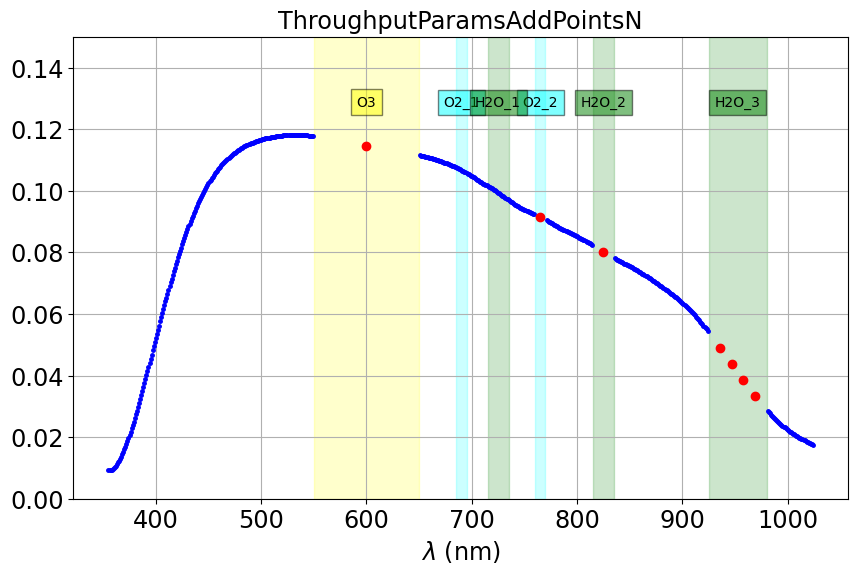

In [28]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

ax.plot(th.wl,th.th,'.',color="b", markersize=5)
for item in th.newpointsinbands.items():
    key = item[0]
    val = item[1]
    ax.plot(val["wl"],val["th"],'or')

the_ymin = 0
the_ymax = .15
the_yscale = the_ymax  - the_ymin 


for item in Dict_Absbands.items():
    key = item[0]
    val = item[1]
    idx_abscolor = val[2] 
    the_x = (val[0]+val[1])/2.
    the_y = the_ymax - 0.15* the_yscale
    rect = Rectangle((val[0],the_ymin),val[1]-val[0],the_ymax,linewidth=1,edgecolor=Absbands_Colors[idx_abscolor],facecolor=Absbands_Colors[idx_abscolor],alpha=0.2)
    ax.add_patch(rect)
    ax.text(the_x, the_y, key, horizontalalignment='center',bbox=dict(facecolor=Absbands_Colors[idx_abscolor], alpha=0.5))
    
ax.set_ylim(the_ymin,the_ymax)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("ThroughputParamsAddPointsN")
ax.grid()

In [29]:
#newscales = { "O3": [0.95,1.05,1.01],"O2_2": [1.05],"H2O_2": [0.97],"H2O_3": [1.1,1.2, 0.9, 0.8 ]}
newscales = { "O3": [1.05],"O2_2": [1.05],"H2O_2": [0.97],"H2O_3": [1.1,1.2, 0.9, 0.8 ]}

In [30]:
th.pointsinbands

OrderedDict([('O3', {'wl': array([600.]), 'th': array([0.11451268])}),
             ('O2_2', {'wl': array([765.]), 'th': array([0.09142118])}),
             ('H2O_2', {'wl': array([825.]), 'th': array([0.08023664])}),
             ('H2O_3',
              {'wl': array([936., 947., 958., 969.]),
               'th': array([0.04909612, 0.04386911, 0.03857895, 0.03347839])})])

In [31]:
th.setnewscales(newscales)

In [32]:
th.printinfo()

Throughputinfo : ThrouputParamsAddPointsN
Throughputinfo : ThrouputParamsAddPointsN
Total number of points 670
	 wl  =  [355. 356. 357. 358. 359.]
	 th  =  [0.00917598 0.00920563 0.00930466 0.00947106 0.00970285]
	 eth =  [0.00042481 0.00043311 0.00044499 0.00045928 0.00047523]
Throughputinfo : ThrouputParamsAddPointsN
	 number of points in bands = 7
	 O3 , npts = 1
	 O2_2 , npts = 1
	 H2O_2 , npts = 1
	 H2O_3 , npts = 4
Throughputinfo : ThrouputParamsAddPointsN
	 number of params = 7
	 O3 , npts = 1, scale parameters =  [1.05]
	 O2_2 , npts = 1, scale parameters =  [1.05]
	 H2O_2 , npts = 1, scale parameters =  [0.97]
	 H2O_3 , npts = 4, scale parameters =  [1.1, 1.2, 0.9, 0.8]
	 	 - original points values :  OrderedDict([('O3', {'wl': array([600.]), 'th': array([0.11451268])}), ('O2_2', {'wl': array([765.]), 'th': array([0.09142118])}), ('H2O_2', {'wl': array([825.]), 'th': array([0.08023664])}), ('H2O_3', {'wl': array([936., 947., 958., 969.]), 'th': array([0.04909612, 0.04386911, 0

In [33]:
th.newpointsinbands

OrderedDict([('O3', {'wl': array([600.]), 'th': array([0.12023831])}),
             ('O2_2', {'wl': array([765.]), 'th': array([0.09599224])}),
             ('H2O_2', {'wl': array([825.]), 'th': array([0.07782955])}),
             ('H2O_3',
              {'wl': array([936., 947., 958., 969.]),
               'th': array([0.05400573, 0.05264293, 0.03472105, 0.02678271])})])

In [34]:
x = np.arange(350,1100)
y,ey = th.fitthrouputwithgp(x)

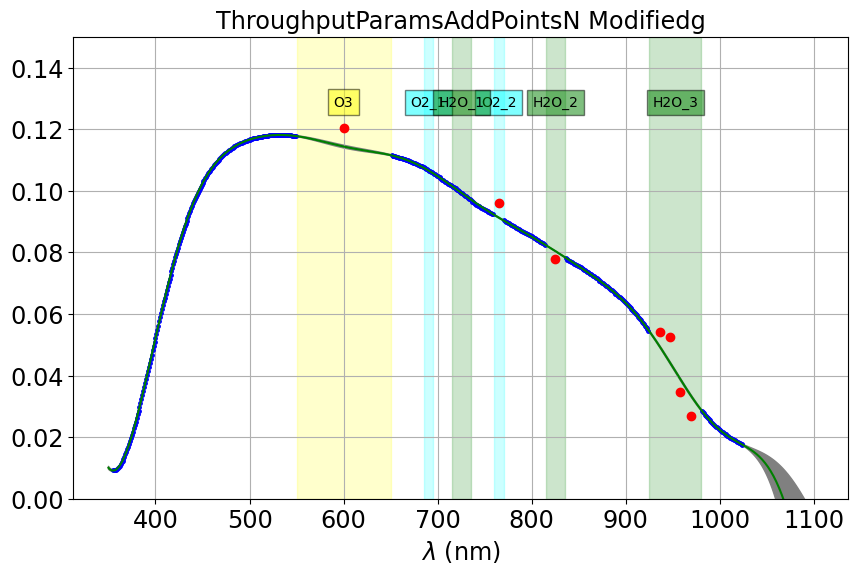

In [35]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

ax.plot(th.wl,th.th,'.',color="b", markersize=5)
for item in th.newpointsinbands.items():
    key = item[0]
    val = item[1]
    ax.plot(val["wl"],val["th"],'or')

the_ymin = 0
the_ymax = .15
the_yscale = the_ymax  - the_ymin 


for item in Dict_Absbands.items():
    key = item[0]
    val = item[1]
    idx_abscolor = val[2] 
    the_x = (val[0]+val[1])/2.
    the_y = the_ymax - 0.15* the_yscale
    rect = Rectangle((val[0],the_ymin),val[1]-val[0],the_ymax,linewidth=1,edgecolor=Absbands_Colors[idx_abscolor],facecolor=Absbands_Colors[idx_abscolor],alpha=0.2)
    ax.add_patch(rect)
    ax.text(the_x, the_y, key, horizontalalignment='center',bbox=dict(facecolor=Absbands_Colors[idx_abscolor], alpha=0.5))
    
ax.set_ylim(the_ymin,the_ymax)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("ThroughputParamsAddPointsN Modifiedg")
ax.plot(x,y,color='g')
ax.fill_between(x, y-ey, y+ey,color="grey")
ax.grid()

# ReSet unit params

In [36]:
th.setuniscales()

(array([1., 1., 1., 1., 1., 1., 1.]),
 {'O3': array([1]),
  'O2_2': array([1]),
  'H2O_2': array([1]),
  'H2O_3': array([1, 1, 1, 1])})

In [37]:
th.printinfo()

Throughputinfo : ThrouputParamsAddPointsN
Throughputinfo : ThrouputParamsAddPointsN
Total number of points 670
	 wl  =  [355. 356. 357. 358. 359.]
	 th  =  [0.00917598 0.00920563 0.00930466 0.00947106 0.00970285]
	 eth =  [0.00042481 0.00043311 0.00044499 0.00045928 0.00047523]
Throughputinfo : ThrouputParamsAddPointsN
	 number of points in bands = 7
	 O3 , npts = 1
	 O2_2 , npts = 1
	 H2O_2 , npts = 1
	 H2O_3 , npts = 4
Throughputinfo : ThrouputParamsAddPointsN
	 number of params = 7
	 O3 , npts = 1, scale parameters =  [1]
	 O2_2 , npts = 1, scale parameters =  [1]
	 H2O_2 , npts = 1, scale parameters =  [1]
	 H2O_3 , npts = 4, scale parameters =  [1 1 1 1]
	 	 - original points values :  OrderedDict([('O3', {'wl': array([600.]), 'th': array([0.11451268])}), ('O2_2', {'wl': array([765.]), 'th': array([0.09142118])}), ('H2O_2', {'wl': array([825.]), 'th': array([0.08023664])}), ('H2O_3', {'wl': array([936., 947., 958., 969.]), 'th': array([0.04909612, 0.04386911, 0.03857895, 0.0334783

In [38]:
x = np.arange(350,1100)
y,ey = th.fitthrouputwithgp(x)

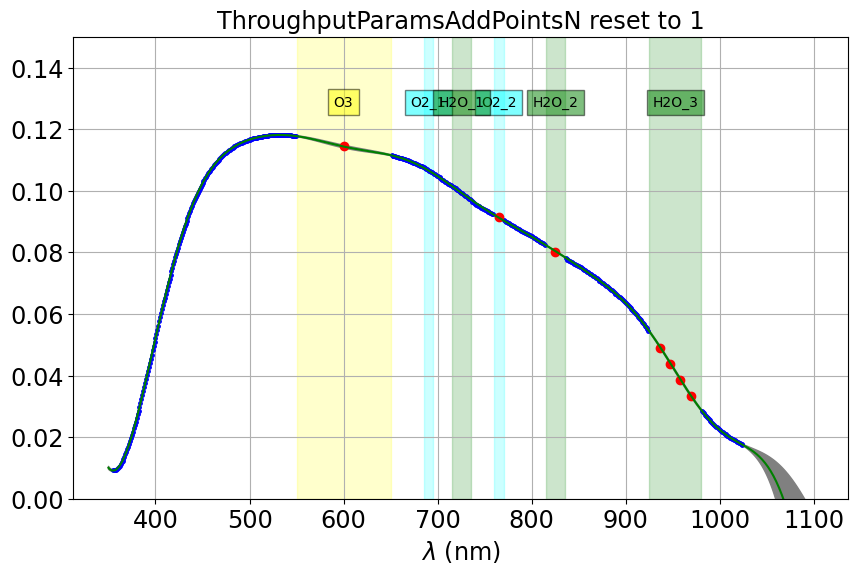

In [39]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

ax.plot(th.wl,th.th,'.',color="b", markersize=5)
for item in th.newpointsinbands.items():
    key = item[0]
    val = item[1]
    ax.plot(val["wl"],val["th"],'or')

the_ymin = 0
the_ymax = .15
the_yscale = the_ymax  - the_ymin 


for item in Dict_Absbands.items():
    key = item[0]
    val = item[1]
    idx_abscolor = val[2] 
    the_x = (val[0]+val[1])/2.
    the_y = the_ymax - 0.15* the_yscale
    rect = Rectangle((val[0],the_ymin),val[1]-val[0],the_ymax,linewidth=1,edgecolor=Absbands_Colors[idx_abscolor],facecolor=Absbands_Colors[idx_abscolor],alpha=0.2)
    ax.add_patch(rect)
    ax.text(the_x, the_y, key, horizontalalignment='center',bbox=dict(facecolor=Absbands_Colors[idx_abscolor], alpha=0.5))
    
ax.set_ylim(the_ymin,the_ymax)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("ThroughputParamsAddPointsN reset to 1")
ax.plot(x,y,color='g')
ax.fill_between(x, y-ey, y+ey,color="grey")
ax.grid()